Iteration 1: Best Cost = 18.50777140252852
Iteration 2: Best Cost = 2.7743555724278957
Iteration 3: Best Cost = 1.8376225094267804
Iteration 4: Best Cost = 1.1736165043437392
Iteration 5: Best Cost = 0.22651237599181837
Iteration 6: Best Cost = 0.0825418701224907
Iteration 7: Best Cost = 0.07284921201606513
Iteration 8: Best Cost = 0.06889427431233747
Iteration 9: Best Cost = 0.05389430514959543
Iteration 10: Best Cost = 0.04348464697991791
Iteration 11: Best Cost = 0.04126680766579712
Iteration 12: Best Cost = 0.03046654568646118
Iteration 13: Best Cost = 0.028177044068206435
Iteration 14: Best Cost = 0.016962587521136187
Iteration 15: Best Cost = 0.014511496749666515
Iteration 16: Best Cost = 0.00962218736145887
Iteration 17: Best Cost = 0.006014217287162652
Iteration 18: Best Cost = 0.003453035105602606
Iteration 19: Best Cost = 0.002974821446224191
Iteration 1: Best Cost = 3.9834931220457337
Iteration 2: Best Cost = 0.4031364996939428
Iteration 3: Best Cost = 0.16460449633074037
It

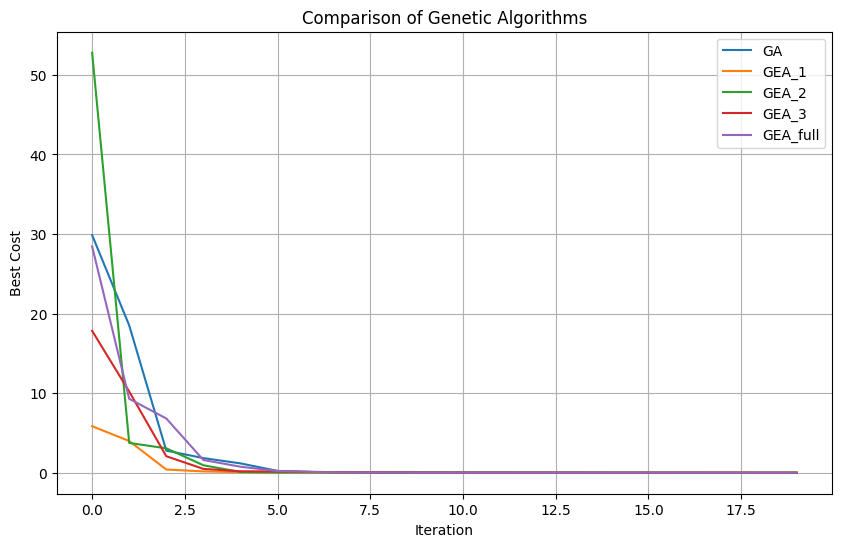

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

global NFE
NFE = 0

def sphere(x):
    global NFE
    if pd.isna(NFE):
        NFE = 0
    NFE += 1
    return sum(item**2 for item in x)

def pop_sort(p, c):
    li = [[c[i], i] for i in range(len(c))]
    li.sort()
    sorted_index = [x[1] for x in li]
    sorted_pop = [p[i] for i in sorted_index]
    sorted_cost = [c[i] for i in sorted_index]
    return sorted_pop, sorted_cost

def CrossOver(x1, x2, gamma, varMin, varMax):
    alpha = np.random.uniform(-gamma, 1+gamma, size=len(x1))
    y1 = np.clip(alpha * np.array(x1) + (1 - alpha) * np.array(x2), varMin, varMax)
    y2 = np.clip(alpha * np.array(x2) + (1 - alpha) * np.array(x1), varMin, varMax)
    return y1.tolist(), y2.tolist()

def mutation(x, varMax, varMin):
    j = np.random.randint(len(x))
    x_mutated = x[:]
    x_mutated[j] += np.random.uniform(-0.1, 0.1)
    x_mutated[j] = np.clip(x_mutated[j], varMin, varMax)
    return x_mutated

def roulette_wheel_selection(costs, beta):
    costs = np.array(costs)
    worst_cost = np.max(costs)
    scaled_fitness = np.exp(-beta * (costs - worst_cost) / worst_cost)
    probabilities = scaled_fitness / np.sum(scaled_fitness)
    return np.random.choice(len(costs), p=probabilities)

def tournament_selection(costs, k=3):
    selected = np.random.choice(len(costs), k, replace=False)
    return selected[np.argmin([costs[i] for i in selected])]

def gea_operator_1(ind):
    return [x * np.random.uniform(0.9, 1.1) for x in ind]  # Small perturbation

def gea_operator_2(ind):
    return np.roll(ind, shift=1).tolist()  # Shifting elements

def gea_operator_3(ind):
    idx1, idx2 = np.random.choice(len(ind), 2, replace=False)
    ind[idx1], ind[idx2] = ind[idx2], ind[idx1]  # Swap mutation
    return ind

def run_ga(scenario=None, selection_method='roulette'):
    nVar, varMin, varMax = 5, -10, 10
    maxIt, nPop = 20, 100
    pc, pm = 0.8, 0.3
    nc, nm = 2 * round(pc * nPop / 2), round(pm * nPop)
    gamma, beta = 0.05, 8
    pop = [list(np.random.uniform(varMin, varMax, size=nVar)) for _ in range(nPop)]
    costs = [sphere(ind) for ind in pop]
    pop, costs = pop_sort(pop, costs)
    bestCosts = [costs[0]]

    for it in range(1, maxIt):
        popc, popc_cost = [], []
        for _ in range(nc // 2):
            if selection_method == 'roulette':
                p1 = pop[roulette_wheel_selection(costs, beta)]
                p2 = pop[roulette_wheel_selection(costs, beta)]
            elif selection_method == 'tournament':
                p1 = pop[tournament_selection(costs)]
                p2 = pop[tournament_selection(costs)]

            y1, y2 = CrossOver(p1, p2, gamma, varMin, varMax)
            popc.extend([y1, y2])
            popc_cost.extend([sphere(y1), sphere(y2)])

        popm, popm_cost = [], []
        for _ in range(nm):
            p = pop[np.random.randint(nPop)]
            mutated = mutation(p, varMax, varMin)

            if scenario == 'GEA_1' or scenario == 'GEA_full':
                mutated = gea_operator_1(mutated)
            if scenario == 'GEA_2' or scenario == 'GEA_full':
                mutated = gea_operator_2(mutated)
            if scenario == 'GEA_3' or scenario == 'GEA_full':
                mutated = gea_operator_3(mutated)

            popm.append(mutated)
            popm_cost.append(sphere(mutated))

        pop += popc + popm
        costs += popc_cost + popm_cost
        pop, costs = pop_sort(pop, costs)
        pop, costs = pop[:nPop], costs[:nPop]
        bestCosts.append(costs[0])
        print(f'Iteration {it}: Best Cost = {bestCosts[-1]}')

    return bestCosts

# Run all algorithms
algorithms = ['GA', 'GEA_1', 'GEA_2', 'GEA_3', 'GEA_full']
results = {
    'GA': run_ga(selection_method='roulette'),
    'GEA_1': run_ga('GEA_1', selection_method='roulette'),
    'GEA_2': run_ga('GEA_2', selection_method='roulette'),
    'GEA_3': run_ga('GEA_3', selection_method='roulette'),
    'GEA_full': run_ga('GEA_full', selection_method='tournament'),  # Using tournament for full scenario
}

# Plot results
plt.figure(figsize=(10, 6))
for alg in algorithms:
    plt.plot(results[alg], label=alg)
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.title('Comparison of Genetic Algorithms')
plt.legend()
plt.grid()
plt.show()
